# Two-layer Neural Network using TensorFlow 2 on MNIST Dataset
##  CPE 490 590
### Author: Rahul Bhadani

### MNIST dataset is a dataset for handwritten digits

In [10]:
!ls -lrt Dataset/MNIST

total 30296
-rw-rw-r-- 1 infinitive infinitive 18289443 Feb 17  2018 mnist_test.csv
-rw-rw-r-- 1 infinitive infinitive 12721722 Mar  4 17:29 mnist_train.csv.gz


# Load the training Dataset

In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Set the font parameters
plt.rcParams['font.family'] = 'Serif'

# Load the dataset
df = pd.read_csv("Dataset/MNIST/mnist_train.csv.gz", header=None, compression='gzip')
df



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, the first column with index 0 is label (digit 5 for first row, digit 0 for the second row, and so on)

# Let's visualize a few samples

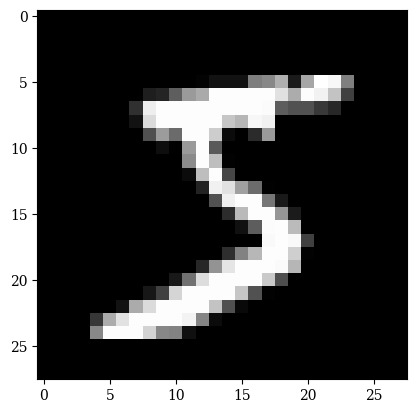

In [5]:
index = 0
first_row = df.iloc[index, 1:]

# Reshape the row to a 28x28 array
image = np.reshape(first_row.values, (28, 28))

# Plot the digit
plt.imshow(image, cmap='gray')
plt.show()

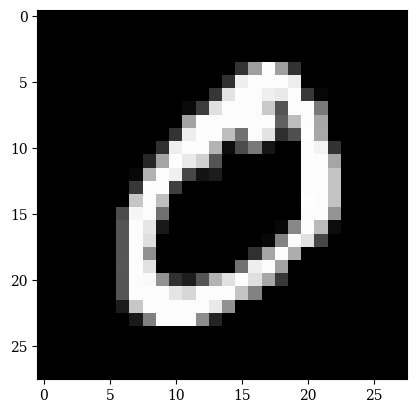

In [6]:
index = 1
first_row = df.iloc[index, 1:]

# Reshape the row to a 28x28 array
image = np.reshape(first_row.values, (28, 28))

# Plot the digit
plt.imshow(image, cmap='gray')
plt.show()

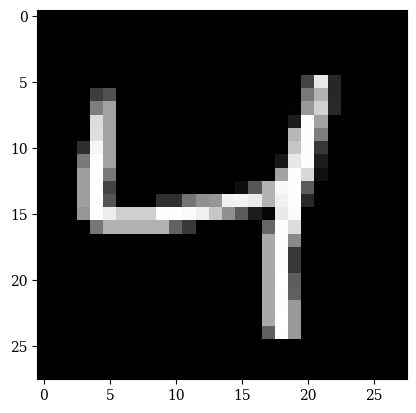

In [7]:
index = 2
first_row = df.iloc[index, 1:]

# Reshape the row to a 28x28 array
image = np.reshape(first_row.values, (28, 28))

# Plot the digit
plt.imshow(image, cmap='gray')
plt.show()

# Separate features and labels


In [12]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values.reshape(-1, 1)
y = tf.keras.utils.to_categorical(df.iloc[:, 0].values)


`tf.keras.utils.to_categorical()`: This function converts a class vector (integers) to a binary class matrix, for use with categorical_crossentropy. It’s a way to “one-hot encode” your labels.
For example, if you have 4 classes (0, 1, 2, 3) and your vector is [1, 2, 3, 0], to_categorical would turn it into a binary matrix that looks like this:

$$
[[0., 1., 0., 0.],\\
[0., 0., 1., 0.],\\
[0., 0., 0., 1.],\\
[1., 0., 0., 0.]]
$$

# Split the data into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# Compile the model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the Model

In [28]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 2.6408 - accuracy: 0.1566
Epoch 2/100
1500/1500 [==============================] - 1s 979us/step - loss: 2.1208 - accuracy: 0.1931
Epoch 3/100
1500/1500 [==============================] - 1s 973us/step - loss: 2.0729 - accuracy: 0.2001
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 2.0405 - accuracy: 0.2051
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 2.0146 - accuracy: 0.2096
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9892 - accuracy: 0.2175
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9653 - accuracy: 0.2231
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9455 - accuracy: 0.2266
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9057 - accuracy: 0.2476
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step

# Load the test data

In [52]:
df_test = pd.read_csv('/home/infinitive/VersionControl/cpe490590_ml_sp24/Dataset/MNIST/mnist_test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_unknown = df_test.values
X_unknown = df_test.iloc[:, 1:].values
y_known = df_test.iloc[:, 0].values.reshape(-1, 1)

# Predict the labels of the unknown data

In [54]:
y_pred = model.predict(X_unknown)

313/313 [==============================] - 1s 3ms/step


# Convert probabilities to class labels

In [57]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [58]:
print(y_pred_labels)


[7 6 1 ... 9 3 6]


# Compute accuracy

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_known, y_pred_labels)

print("Accuracy: ", accuracy)

Accuracy:  0.5444


In [60]:
y_known.reshape(-1)

array([7, 2, 1, ..., 4, 5, 6])

In [61]:
y_pred_labels

array([7, 6, 1, ..., 9, 3, 6])

# Find the indices of the accurately predicted samples


In [62]:
accurate_indices = np.where(y_pred_labels == y_known.reshape(-1))[0]
accurate_indices.shape

(5444,)

In [64]:
accurate_indices

array([   0,    2,    4, ..., 9994, 9996, 9999])

In [63]:
# Get the accurately predicted samples
accurate_samples = df_test.iloc[accurate_indices]
accurate_samples

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Let's verify

In [69]:
y_pred_labels[5]

1

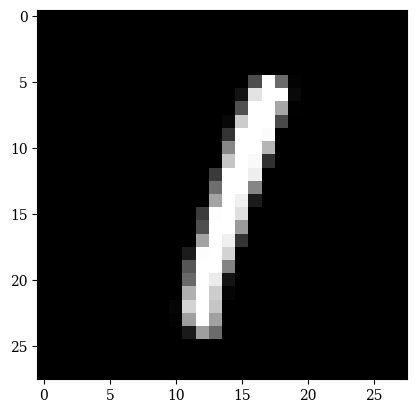

In [70]:
first_row = df_test.iloc[5, 1:]

# Reshape the row to a 28x28 array
image = np.reshape(first_row.values, (28, 28))

# Plot the digit
plt.imshow(image, cmap='gray')
plt.show()